In [162]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import seaborn as sns; sns.set()
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [163]:
datasets = pd.read_csv('prepared_dataset.csv')
datasets

,street,city,zip,beds,baths,sq__ft,price
0,3526 HIGH ST,SACRAMENTO,95838,2,1,836,59222
1,51 OMAHA CT,SACRAMENTO,95823,3,1,1167,68212
2,2796 BRANCH ST,SACRAMENTO,95815,2,1,796,68880
3,2805 JANETTE WAY,SACRAMENTO,95815,2,1,852,69307
4,6001 MCMAHON DR,SACRAMENTO,95824,2,1,797,81900
...,...,...,...,...,...,...,...
1369,Colonial,Croydon,19021,3,2,1559,180000
1370,Colonial,Croydon,19021,3,2,1559,185000
1371,State,Croydon,19021,3,3,1568,185000
1372,High,Croydon,19021,3,3,1260,175000


In [164]:
X = datasets.iloc[:, [3,5]]
Y = datasets.iloc[:, 4]
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

# Support Vector Classification

In [166]:
classifier = SVC(kernel = 'linear', random_state = 0)
param_grid = {'C': [0.05,0.1,0.5,1],
              'gamma': [0.00000000000001,0.00000000001,0.000000001]}

# Tuning C and gamma parameters for SVC using cross-validation
grid = GridSearchCV(classifier, param_grid)
%time grid.fit(X_Train, Y_Train)
print(grid.best_params_)
classifier = grid.best_estimator_

Y_Pred = classifier.predict(X_Test)
print("Accuracy:", accuracy_score(Y_Test, Y_Pred))

CPU times: user 410 ms, sys: 7.23 ms, total: 417 ms
Wall time: 441 ms
{'C': 0.05, 'gamma': 1e-14}
Accuracy: 0.6744186046511628


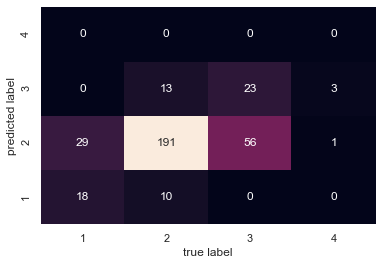

In [127]:
def plot_confusion(cm, labels):
    ax=sns.heatmap(cm.T, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    ax.set_ylim([0, 4])
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

Y_Pred = classifier.predict(X_Test)
cm = confusion_matrix(Y_Test, Y_Pred)
plot_confusion(cm, sorted(set(Y_Test)))

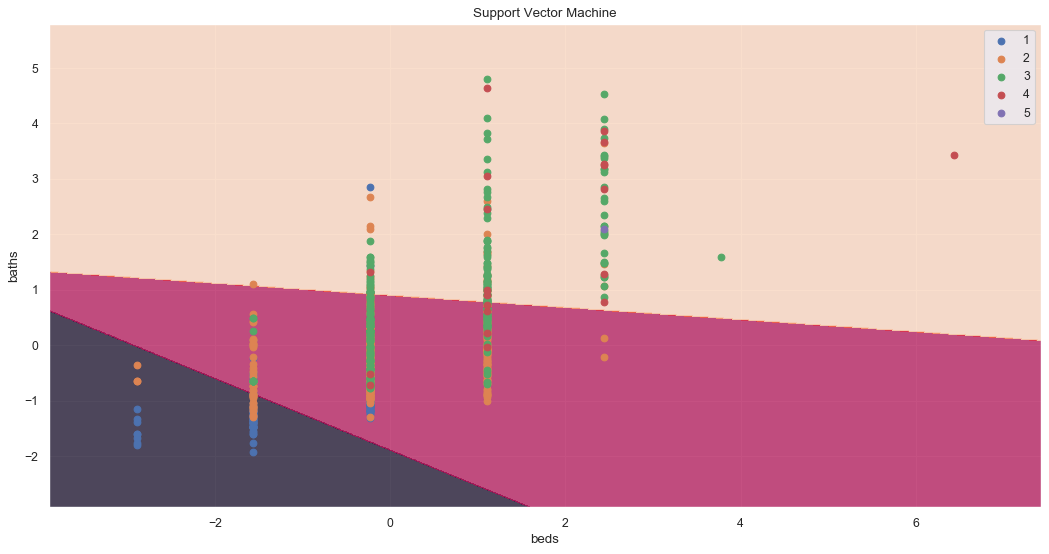

In [128]:
X_Set, Y_Set = X_Train, Y_Train
X1, X2 = np.meshgrid(np.arange(start = X_Set[:, 0].min() - 1, stop = X_Set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_Set[:, 1].min() - 1, stop = X_Set[:, 1].max() + 1, step = 0.01))
plt.figure(figsize=(16, 8), dpi=80)
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(Y_Set)):
    plt.scatter(X_Set[Y_Set == j, 0], X_Set[Y_Set == j, 1], label = j)
plt.title('Support Vector Machine')
plt.xlabel('beds')
plt.ylabel('sq-ft')
plt.legend()
plt.show()

In [167]:
print("Accuracy:", accuracy_score(Y_Test, Y_Pred))

from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))
    

Accuracy: 0.6744186046511628
              precision    recall  f1-score   support

           1       0.64      0.38      0.48        47
           2       0.69      0.89      0.78       214
           3       0.59      0.29      0.39        79
           4       0.00      0.00      0.00         4

    accuracy                           0.67       344
   macro avg       0.48      0.39      0.41       344
weighted avg       0.65      0.67      0.64       344



In [168]:
while True:
    beds=input('Enter the number of bedrooms:')
    if beds:
        area=input('Enter the house area size:')
        
        print(f'Recommended Number of Bathrooms: {classifier.predict(sc_X.transform([[beds,area]]))[0]}')
    else:
        break

Enter the number of bedrooms:2
Enter the house area size:836
Recommended Number of Bathrooms: 1
Enter the number of bedrooms:4
Enter the house area size:1000
Recommended Number of Bathrooms: 2
Enter the number of bedrooms:6
Enter the house area size:10000
Recommended Number of Bathrooms: 3
Enter the number of bedrooms:10
Enter the house area size:100000
Recommended Number of Bathrooms: 3
Enter the number of bedrooms:


# K Nearest Neighbors

{'n_neighbors': 7}


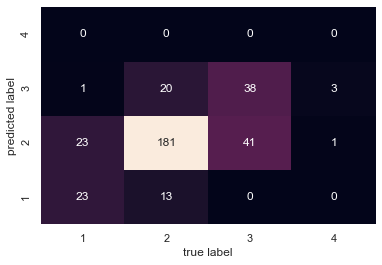

In [169]:
from sklearn.neighbors import KNeighborsClassifier


KNN_model = KNeighborsClassifier()
param_grid = {'n_neighbors': [7,8,9,10,11]}

# Tuining 'n_neighbors' using cross-validation
grid = GridSearchCV(KNN_model, param_grid).fit(X_Train, Y_Train)
print(grid.best_params_)
KNN_model = grid.best_estimator_

Y_Pred = KNN_model.predict(X_Test)

cm = confusion_matrix(Y_Test, Y_Pred)
plot_confusion(cm, sorted(set(Y_Test))) 

In [171]:
print("Test set accuracy: {:.2f}".format(KNN_model.score(X_Test, Y_Test)))

print("Accuracy:", accuracy_score(Y_Test, Y_Pred))

from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred))


Test set accuracy: 0.70
Accuracy: 0.7034883720930233
              precision    recall  f1-score   support

           1       0.64      0.49      0.55        47
           2       0.74      0.85      0.79       214
           3       0.61      0.48      0.54        79
           4       0.00      0.00      0.00         4

    accuracy                           0.70       344
   macro avg       0.50      0.45      0.47       344
weighted avg       0.69      0.70      0.69       344



In [173]:
while True:
    beds=input('Enter the number of bedrooms:')
    if beds:
        area=input('Enter the house area size:')
        print(f'Recommended Number of Bathrooms: {KNN_model.predict(sc_X.transform([[beds,area]]))[0]}')
    else:
        break

Enter the number of bedrooms:4
Enter the house area size:1000
Recommended Number of Bathrooms: 2
Enter the number of bedrooms:6
Enter the house area size:10000
Recommended Number of Bathrooms: 3
Enter the number of bedrooms:


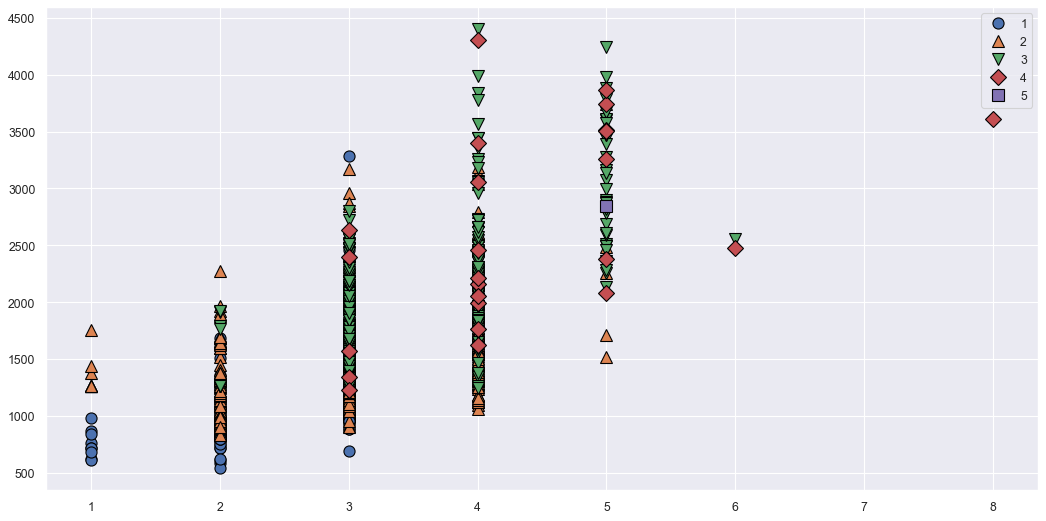

In [192]:
import mglearn
KNN_model.fit(X.values,Y)
plt.figure(figsize=(16, 8), dpi=80)
# mglearn.plots.plot_2d_separator(KNN_model, X.values,fill=True, eps=0.5, alpha=.4)
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], Y)
plt.legend()
plt.show()

# Gaussian Mixture Models

CPU times: user 29.8 ms, sys: 9.21 ms, total: 39 ms
Wall time: 38.8 ms
CPU times: user 1.7 ms, sys: 142 µs, total: 1.85 ms
Wall time: 1.77 ms


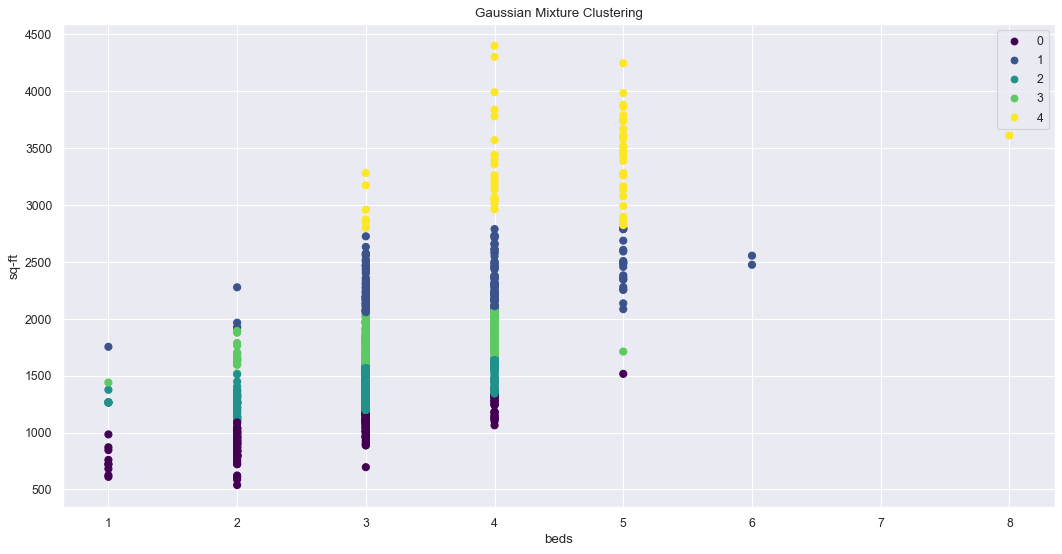

In [188]:
from sklearn.mixture import GaussianMixture as GMM
%time gmm = GMM(n_components=len(set(Y))).fit(X)
%time labels = gmm.predict(X)
plt.figure(figsize=(16, 8), dpi=80)
scatter=plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels, s=40, cmap='viridis')
plt.legend(*scatter.legend_elements())
plt.title('Gaussian Mixture Clustering')
plt.xlabel('beds')
plt.ylabel('sq-ft')
plt.show()